In [1]:
import pandas as pd
import numpy as np
import plotly.express as plt
from IPython.display import Image

## Loading in data

In [2]:
deaths = pd.read_csv("data/covid_deaths_usafacts.csv")
cases = pd.read_csv("data/covid_confirmed_usafacts.csv")
data = pd.read_csv('data/covid_county_population_usafacts.csv')


In [3]:
# Drop statewide unallocated, since we will later be analyzing at a county level.
cases = cases[cases['County Name'] != 'Statewide Unallocated']
deaths = deaths[deaths['County Name'] != 'Statewide Unallocated']

# Drop FIPS columns, as they will not be used
cases.drop(columns=['countyFIPS', 'StateFIPS'], inplace=True)
deaths.drop(columns=['countyFIPS', 'StateFIPS'], inplace=True)

# Filter the data for only the date range we are interested in
start_date ='2020-06-23'
end_date = '2020-12-27'

# Get the column headings that are dates, skipping county name and state abbreviation
date_columns = cases.columns[2:]
filtered_columns = [col for col in date_columns if start_date <= col <= end_date]
# Add County Name and State to the list
filtered_columns.insert(0, 'County Name')
filtered_columns.insert(0, 'State')

# Use our list of filtered columns to create our dataframes, dropping everything else
filtered_cases = cases[list(filtered_columns)]
filtered_deaths = deaths[list(filtered_columns)]

In [4]:
filtered_cases.head()

,State,County Name,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28,2020-06-29,2020-06-30,...,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27
1,AL,Autauga County,453,469,479,488,498,503,527,537,...,3647,3698,3741,3780,3841,3889,3942,3990,3999,4029
2,AL,Baldwin County,450,464,477,515,555,575,643,680,...,11556,11722,11827,11952,12155,12321,12521,12666,12708,12825
3,AL,Barbour County,280,288,305,312,317,317,322,325,...,1318,1330,1336,1336,1363,1383,1390,1396,1398,1406
4,AL,Bibb County,135,141,149,153,161,162,165,170,...,1577,1601,1613,1628,1660,1683,1711,1725,1739,1746
5,AL,Blount County,159,168,176,184,188,189,199,208,...,4118,4191,4218,4234,4313,4367,4405,4441,4446,4465


In [5]:
filtered_deaths.head()

,State,County Name,2020-06-23,2020-06-24,2020-06-25,2020-06-26,2020-06-27,2020-06-28,2020-06-29,2020-06-30,...,2020-12-18,2020-12-19,2020-12-20,2020-12-21,2020-12-22,2020-12-23,2020-12-24,2020-12-25,2020-12-26,2020-12-27
1,AL,Autauga County,9,11,11,11,12,12,12,12,...,44,44,44,44,44,46,46,46,46,47
2,AL,Baldwin County,9,9,9,9,10,10,10,10,...,146,147,147,147,149,151,151,151,151,152
3,AL,Barbour County,1,1,1,1,1,1,1,1,...,30,32,32,32,32,32,32,32,32,32
4,AL,Bibb County,1,1,1,1,1,1,1,1,...,42,42,42,42,42,42,42,42,42,42
5,AL,Blount County,1,1,1,1,1,1,1,1,...,52,54,54,54,54,57,58,58,58,58


### Averages 
Getting the averages for cases and deaths

In [6]:
weekly_cases = filtered_cases.copy()

metadata = weekly_cases[['State', 'County Name']].copy()

weekly_cases = weekly_cases.drop(['State', 'County Name'], axis=1)

date_columns = weekly_cases.columns
weekly_cases.columns = pd.to_datetime(weekly_cases.columns)
weekly_cases = weekly_cases.resample('W', axis=1).mean().astype('int')
weekly_cases.columns = weekly_cases.columns.strftime('%Y-%m-%d')

weekly_cases = pd.concat([metadata, weekly_cases], axis=1)
weekly_cases

/tmp/ipykernel_15324/2748904747.py:9: FutureWarning: DataFrame.resample with axis=1 is deprecated. Do `frame.T.resample(...)` without axis instead.
  weekly_cases = weekly_cases.resample('W', axis=1).mean().astype('int')


,State,County Name,2020-06-28,2020-07-05,2020-07-12,2020-07-19,2020-07-26,2020-08-02,2020-08-09,2020-08-16,...,2020-10-25,2020-11-01,2020-11-08,2020-11-15,2020-11-22,2020-11-29,2020-12-06,2020-12-13,2020-12-20,2020-12-27
1,AL,Autauga County,481,564,662,781,901,1001,1110,1244,...,2027,2122,2231,2382,2552,2698,2899,3161,3560,3924
2,AL,Baldwin County,506,766,1114,1619,2379,2990,3439,3822,...,6515,6815,7098,7462,7945,8550,9328,10233,11377,12449
3,AL,Barbour County,303,336,376,454,531,587,620,651,...,1005,1050,1082,1114,1144,1169,1206,1251,1308,1381
4,AL,Bibb County,150,180,211,249,297,352,412,468,...,812,861,906,963,1030,1167,1248,1355,1545,1698
5,AL,Blount County,177,221,282,415,580,731,877,977,...,1888,2017,2216,2442,2670,2867,3161,3547,4028,4381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,WY,Sweetwater County,73,94,126,161,203,235,254,268,...,442,526,659,942,1268,1668,2002,2301,2628,2814
3189,WY,Teton County,117,134,150,181,250,327,365,378,...,728,782,901,1083,1293,1510,1700,1853,1969,2047
3190,WY,Uinta County,162,179,196,214,227,249,270,276,...,415,467,526,661,852,1012,1139,1265,1376,1474
3191,WY,Washakie County,39,39,41,43,44,46,62,88,...,141,154,176,204,273,388,496,600,673,729


In [7]:
weekly_deaths = filtered_deaths.copy()
metadata = weekly_deaths[['State', 'County Name']].copy()
weekly_deaths = weekly_deaths.drop(['State', 'County Name'], axis=1)

date_columns = weekly_deaths.columns
weekly_deaths.columns = pd.to_datetime(weekly_deaths.columns)
weekly_deaths = weekly_deaths.resample('W', axis=1).mean().astype('int')
weekly_deaths.columns = weekly_deaths.columns.strftime('%Y-%m-%d')

weekly_deaths = pd.concat([metadata, weekly_deaths], axis=1)
weekly_deaths

/tmp/ipykernel_15324/398713249.py:7: FutureWarning: DataFrame.resample with axis=1 is deprecated. Do `frame.T.resample(...)` without axis instead.
  weekly_deaths = weekly_deaths.resample('W', axis=1).mean().astype('int')


,State,County Name,2020-06-28,2020-07-05,2020-07-12,2020-07-19,2020-07-26,2020-08-02,2020-08-09,2020-08-16,...,2020-10-25,2020-11-01,2020-11-08,2020-11-15,2020-11-22,2020-11-29,2020-12-06,2020-12-13,2020-12-20,2020-12-27
1,AL,Autauga County,11,12,14,19,21,21,21,22,...,29,30,30,33,38,40,41,41,43,45
2,AL,Baldwin County,9,10,11,13,16,20,25,31,...,68,69,78,83,84,94,131,140,144,150
3,AL,Barbour County,1,1,2,2,4,4,5,5,...,9,9,9,9,9,10,23,29,30,32
4,AL,Bibb County,1,1,1,1,2,2,4,5,...,13,14,15,16,17,17,32,39,41,42
5,AL,Blount County,1,1,1,1,1,2,3,4,...,24,25,25,31,35,38,43,46,51,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,WY,Sweetwater County,0,0,0,1,2,2,2,2,...,2,2,3,4,5,6,7,12,14,15
3189,WY,Teton County,1,1,1,1,1,1,1,1,...,1,1,1,2,2,2,2,2,2,2
3190,WY,Uinta County,0,0,0,0,0,0,0,0,...,2,3,3,3,4,4,4,6,7,7
3191,WY,Washakie County,5,5,5,5,5,5,5,5,...,7,7,7,7,7,7,8,10,11,11


## Choosing states 

#### NV, Nevada - population 3.1 million
- NC, North Carolina
- ID, Idaho
- OH,  Ohio
- TX,  Texas 

In [8]:
NV_cases = weekly_cases.copy()
NV_cases = NV_cases[NV_cases['State'] == 'NV']
NV_cases = NV_cases.drop(['State', 'County Name'], axis=1)
NV_cases = NV_cases.T
total_cases_NV = NV_cases.sum(axis=1)


NV_deaths = weekly_deaths.copy()
NV_deaths = NV_deaths[NV_deaths['State'] == 'NV']
NV_deaths = NV_deaths.drop(['State', 'County Name'], axis=1)
NV_deaths = NV_deaths.T
total_deaths_NV = NV_deaths.sum(axis=1)

In [9]:
NV_weekly = pd.concat([total_cases_NV, total_deaths_NV], axis=1, keys=['total_cases', 'total_deaths'])
NV_weekly['date'] = NV_weekly.index
NV_weekly.reset_index(drop=True, inplace=True)
NV_weekly['State'] = 'NV'
NV_weekly = NV_weekly[['date', 'State', 'total_cases', 'total_deaths']]
NV_weekly

,date,State,total_cases,total_deaths
0,2020-06-28,NV,15344,496
1,2020-07-05,NV,19980,519
2,2020-07-12,NV,25199,566
3,2020-07-19,NV,32008,624
4,2020-07-26,NV,39766,699
5,2020-08-02,NV,46946,788
6,2020-08-09,NV,53694,901
7,2020-08-16,NV,58974,1019
8,2020-08-23,NV,63808,1138
9,2020-08-30,NV,67342,1259


In [10]:
NV_weekly['new_cases'] = NV_weekly['total_cases'].diff()
NV_weekly['new_deaths'] = NV_weekly['total_deaths'].diff()
# Drop date outside of our date range, no longer needed after calculation
NV_weekly = NV_weekly.drop(index=0)

In [11]:
NV_weekly.describe().astype('int')


,total_cases,total_deaths,new_cases,new_deaths
count,26,26,26,26
mean,91155,1523,7386,90
std,50165,630,4903,54
min,19980,519,2116,23
25%,60182,1048,3653,49
50%,78849,1580,5439,77
75%,112700,1863,9030,116
max,207382,2845,17863,228


### The trend in Nevada 

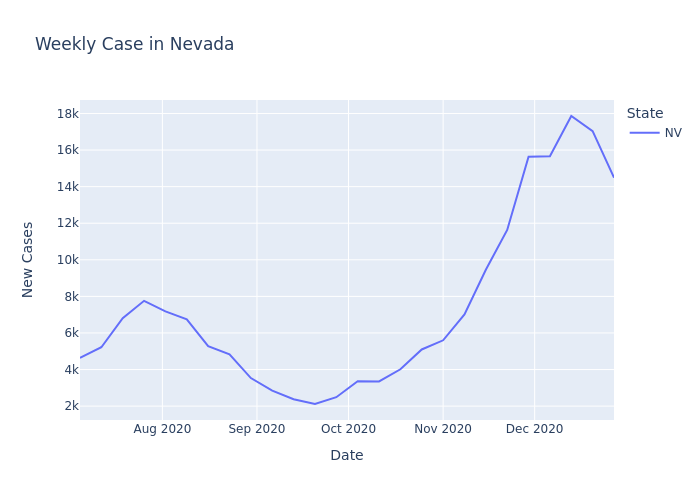

In [12]:
# Create line plots for CUMULATIVE cases and deaths for each country
fig = plt.line(NV_weekly, x='date', y='new_cases', color='State',
              labels={'date': 'Date', 'new_cases': 'New Cases'},
              title='    Weekly Case in Nevada')
# fig.show()
# Show static image instead of interactive plot, for github
img1 = fig.to_image(format="png")
Image(img1)

### Observations:


"Based on the plotted graph, Nevada shows an increase in cases around the month of December. The cause of this increase is not definitively known, but a possible hypothesis is related to the holiday season. During this time, many people tend to come together for various gatherings, which may have led to a spike in cases during the year 2020.

Additionally, there appears to be a smaller spike at the end of July and the beginning of August. This could be attributed to the summer season when people engage in various outdoor activities and vacations. Increased social interactions and travel may have contributed to this uptick in cases during that period.

It's important to note that these observations are based on the data and visual analysis. Further research and investigation would be necessary to confirm these hypotheses and to gain a more comprehensive understanding of the factors influencing the COVID-19 case trends in Nevada during2020."

### Adding the rest of the states
Repeat the process for the remaining 5 states then merge with Nevada data

In [13]:
# Create a copy of the 'weekly_cases' DataFrame for North Carolina (NC)
NC_cases = weekly_cases.copy()

# Filter the data for NC by selecting rows where 'State' is 'NC'
NC_cases = NC_cases[NC_cases['State'] == 'NC']

# Drop the 'State' and 'County Name' columns, leaving only date columns
NC_cases = NC_cases.drop(['State', 'County Name'], axis=1)

# Transpose the DataFrame, so dates become rows and counties become columns
NC_cases = NC_cases.T

# Sum the total cases for each date (across all counties in NC)
total_cases_NC = NC_cases.sum(axis=1)

# Create a copy of the 'weekly_deaths' DataFrame for North Carolina (NC)
NC_deaths = weekly_deaths.copy()

# Filter the data for NC by selecting rows where 'State' is 'NC'
NC_deaths = NC_deaths[NC_deaths['State'] == 'NC']

# Drop the 'State' and 'County Name' columns, leaving only date columns
NC_deaths = NC_deaths.drop(['State', 'County Name'], axis=1)

# Transpose the DataFrame, so dates become rows and counties become columns
NC_deaths = NC_deaths.T

# Sum the total deaths for each date (across all counties in NC)
total_deaths_NC = NC_deaths.sum(axis=1)

# Concatenate the total cases and total deaths into a single DataFrame
NC_weekly = pd.concat([total_cases_NC, total_deaths_NC], axis=1, keys=['total_cases', 'total_deaths'])

# Add a 'date' column to store the index (dates)
NC_weekly['date'] = NC_weekly.index

# Reset the index to have a numerical index
NC_weekly.reset_index(drop=True, inplace=True)

# Add the 'State' column with 'NC' for all rows
NC_weekly['State'] = 'NC'

# Rearrange the columns to match the desired order
NC_weekly = NC_weekly[['date', 'State', 'total_cases', 'total_deaths']]

# Calculate new cases and new deaths by taking the difference between consecutive rows
NC_weekly['new_cases'] = NC_weekly['total_cases'].diff()
NC_weekly['new_deaths'] = NC_weekly['total_deaths'].diff()

# Drop the first row since it contains NaN values for new cases and new deaths
NC_weekly = NC_weekly.drop(index=0)



In [14]:

ID_cases = weekly_cases.copy()
ID_cases = ID_cases[ID_cases['State'] == 'ID']
ID_cases = ID_cases.drop(['State', 'County Name'], axis=1)
ID_cases = ID_cases.T
total_cases_ID = ID_cases.sum(axis=1)


ID_deaths = weekly_deaths.copy()
ID_deaths = ID_deaths[ID_deaths['State'] == 'ID']
ID_deaths = ID_deaths.drop(['State', 'County Name'], axis=1)
ID_deaths = ID_deaths.T
total_deaths_ID = ID_deaths.sum(axis=1)

ID_weekly = pd.concat([total_cases_ID, total_deaths_ID], axis=1, keys=['total_cases', 'total_deaths'])
ID_weekly['date'] = ID_weekly.index
ID_weekly.reset_index(drop=True, inplace=True)
ID_weekly['State'] = 'ID'
ID_weekly = ID_weekly[['date', 'State', 'total_cases', 'total_deaths']]

ID_weekly['new_cases'] = ID_weekly['total_cases'].diff()
ID_weekly['new_deaths'] = ID_weekly['total_deaths'].diff()
ID_weekly = ID_weekly.drop(index=0)


In [15]:
OH_cases = weekly_cases.copy()
OH_cases = OH_cases[OH_cases['State'] == 'OH']
OH_cases = OH_cases.drop(['State', 'County Name'], axis=1)
OH_cases = OH_cases.T
total_cases_OH = OH_cases.sum(axis=1)


OH_deaths = weekly_deaths.copy()
OH_deaths = OH_deaths[OH_deaths['State'] == 'OH']
OH_deaths = OH_deaths.drop(['State', 'County Name'], axis=1)
OH_deaths = OH_deaths.T
total_deaths_OH = OH_deaths.sum(axis=1)

OH_weekly = pd.concat([total_cases_OH, total_deaths_OH], axis=1, keys=['total_cases', 'total_deaths'])
OH_weekly['date'] = OH_weekly.index
OH_weekly.reset_index(drop=True, inplace=True)
OH_weekly['State'] = 'OH'
OH_weekly = OH_weekly[['date', 'State', 'total_cases', 'total_deaths']]

OH_weekly['new_cases'] = OH_weekly['total_cases'].diff()
OH_weekly['new_deaths'] = OH_weekly['total_deaths'].diff()


In [16]:
TX_cases = weekly_cases.copy()
TX_cases = TX_cases[TX_cases['State'] == 'TX']
TX_cases = TX_cases.drop(['State', 'County Name'], axis=1)
TX_cases = TX_cases.T
total_cases_TX = TX_cases.sum(axis=1)


TX_deaths = weekly_deaths.copy()
TX_deaths = TX_deaths[TX_deaths['State'] == 'TX']
TX_deaths = TX_deaths.drop(['State', 'County Name'], axis=1)
TX_deaths = TX_deaths.T
total_deaths_TX = TX_deaths.sum(axis=1)

TX_weekly = pd.concat([total_cases_TX, total_deaths_TX], axis=1, keys=['total_cases', 'total_deaths'])
TX_weekly['date'] = TX_weekly.index
TX_weekly.reset_index(drop=True, inplace=True)
TX_weekly['State'] = 'TX'
TX_weekly = TX_weekly[['date', 'State', 'total_cases', 'total_deaths']]

TX_weekly['new_cases'] = TX_weekly['total_cases'].diff()
TX_weekly['new_deaths'] = TX_weekly['total_deaths'].diff()
TX_weekly = TX_weekly.drop(index=0)


In [17]:
MD_cases = weekly_cases.copy()
MD_cases = MD_cases[MD_cases['State'] == 'MD']
MD_cases = MD_cases.drop(['State', 'County Name'], axis=1)
MD_cases = MD_cases.T
total_cases_MD = MD_cases.sum(axis=1)


MD_deaths = weekly_deaths.copy()
MD_deaths = MD_deaths[MD_deaths['State'] == 'MD']
MD_deaths = MD_deaths.drop(['State', 'County Name'], axis=1)
MD_deaths = MD_deaths.T
total_deaths_MD = MD_deaths.sum(axis=1)

MD_weekly = pd.concat([total_cases_MD, total_deaths_MD], axis=1, keys=['total_cases', 'total_deaths'])
MD_weekly['date'] = MD_weekly.index
MD_weekly.reset_index(drop=True, inplace=True)
MD_weekly['State'] = 'MD'
MD_weekly = MD_weekly[['date', 'State', 'total_cases', 'total_deaths']]

MD_weekly['new_cases'] = MD_weekly['total_cases'].diff()
MD_weekly['new_deaths'] = MD_weekly['total_deaths'].diff()
MD_weekly = MD_weekly.drop(index=0)

In [18]:
states_weekly = pd.concat([NV_weekly, MD_weekly, NC_weekly, OH_weekly, ID_weekly, TX_weekly], axis=0)


In [19]:
states_weekly
state_data= 'state_cases.csv'
states_weekly.to_csv(state_data, index=False)

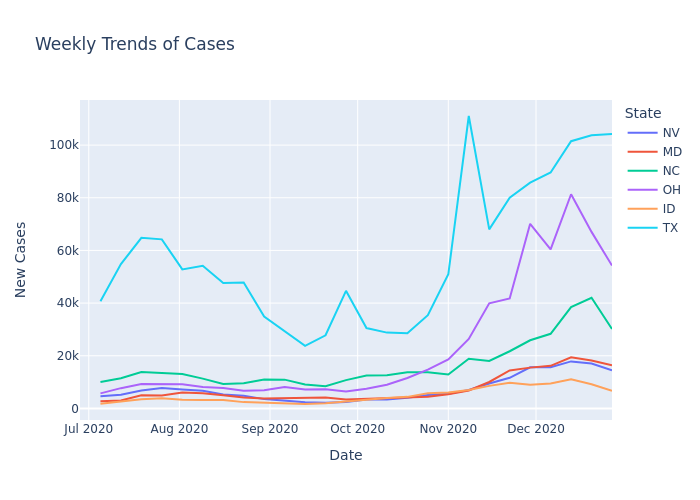

In [20]:
fig = plt.line(states_weekly, x='date', y='new_cases', color='State',
              labels={'date': 'Date', 'new_cases': 'New Cases'},
              title='Weekly Trends of Cases')
img1 = fig.to_image(format="png")
Image(img1)

## Observations:


"Based on the graph, Nevada had the second lowest number of new cases from July to December 2020. The state with the highest number of new cases during this period was Texas, which is expected given its larger population and higher population density. On the other hand, Idaho reported the lowest number of new cases during this time frame.

Additionally, it's worth noting that there was a notable spike in new cases for almost all states in the month of December. This increase in cases across multiple states could be attributed to various factors, including colder weather leading to more indoor gatherings, holiday travel and gatherings, and pandemic fatigue.

Texas, in particular, had a substantial spike in new cases during November. The exact cause of this spike cannot be determined based on this limited data. It may be influenced by a combination of factors, such as community behavior, public health measures, and other local circumstances.

To gain a more comprehensive understanding of the factors influencing these trends, further analysis and investigation would be needed, taking into account various variables and factors that may have contributed to the observed pnt states.

In [24]:

state_populations = data.groupby('State')['population'].sum().reset_index()

# List of states 
states_to_include = ['NV', 'NC', 'ID', 'OH', 'TX', 'MD']

# Initialize a list to store population sums
population_sums = []

# Loop through the specified states
for state in states_to_include:
    state_population_sum = state_populations[state_populations['State'] == state]['population'].sum()
    # Divide the population sum by 100,000
    state_population_sum /= 100000
    population_sums.append((state, state_population_sum))

population_sums

[('NV', 30.80156),
 ('NC', 104.88084),
 ('ID', 17.87065),
 ('OH', 116.891),
 ('TX', 289.95881),
 ('MD', 60.4568)]

In [28]:

states_norm = states_weekly.copy()

# Add a new column 'norm_pop' in states_norm
states_norm['norm_pop'] = 0  # Initialize 'norm_pop' with zeros

# Loop through the states in the dictionary and update 'norm_pop' column
for state, pop in population_sums:
    states_norm.loc[states_norm['State'] == state, 'norm_pop'] = pop

# Normalize the columns by dividing by the population
columns_to_normalize = ['total_cases', 'total_deaths', 'new_cases', 'new_deaths']
for column in columns_to_normalize:
    states_norm[column] = states_norm[column] / states_norm['norm_pop']

# Display the DataFrame with normalized data
states_norm
csv_file_path = 'state_normal.csv'
states_norm.to_csv(csv_file_path, index=False)

/tmp/ipykernel_15324/3561658556.py:8: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '30.80156' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



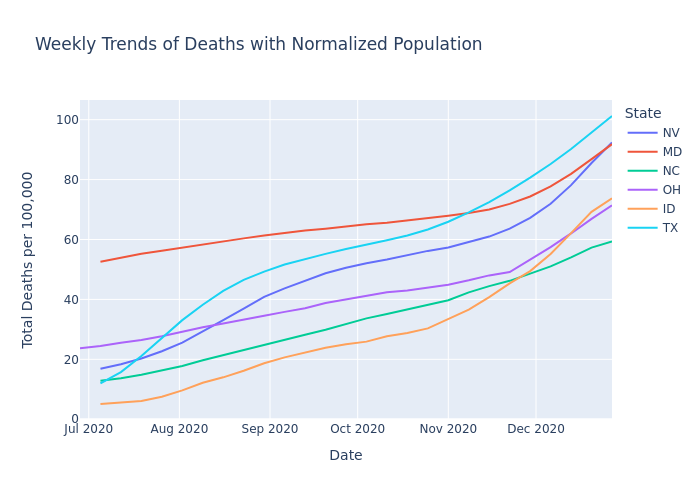

In [26]:
fig = plt.line(states_norm, x='date', y='total_deaths', color='State',
              labels={'date': 'Date', 'total_deaths': 'Total Deaths per 100,000'},
              title='Weekly Trends of Deaths with Normalized Population')
#fig.show()
# Show static image instead of interactive plot, for github
img1 = fig.to_image(format="png")
Image(img1)

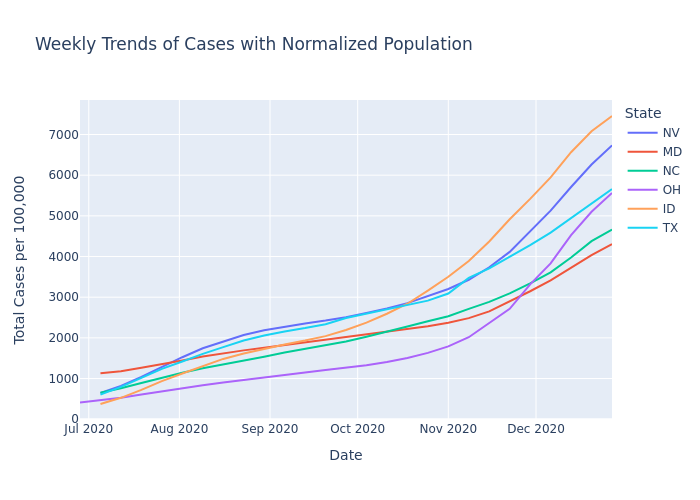

In [27]:
fig = plt.line(states_norm, x='date', y='total_cases', color='State',
              labels={'date': 'Date', 'total_cases': 'Total Cases per 100,000'},
              title='Weekly Trends of Cases with Normalized Population')
#fig.show()
# Show static image instead of interactive plot, for github
img1 = fig.to_image(format="png")
Image(img1)

After normalizing the data by dividing the state population by 100,000, Nevada consistently appeared as the state with the second-highest number of new cases and deaths. There could be several factors contributing to this trend. 

One possible factor is the geographical location and density of Nevada. It's essential to consider that Nevada has unique characteristics, including urban areas with a higher population density, which might have played a role in the increased number of cases and deaths. Additionally, factors like tourism and travel to Las Vegas may have also contributed to the higher numbers.

Another consideration is the timing of data collection. The timing of data reporting can significantly influence the observed trends. Peaks and valleys in the data might align with specific events or testing and reporting patterns.

An interesting observation is that once the data is normalized by population, the peaks and valleys on the graph become less prominent. This normalization allows for a more equitable comparison of different states, taking into account their population size. It also helps in identifying relative differences in cases and deaths among states.


# County data for Nevada

In [ ]:
NV_cases = weekly_cases.copy()
NV_cases = NV_cases[NV_cases['State'] == 'NV']
NV_cases

In [ ]:
NV_cases = NV_cases.sort_values('2020-12-27', ascending=False).head()
NV_cases

NV_cases_df = pd.melt(NV_cases, id_vars=['State', 'County Name'], var_name='Date', value_name='Case Count')
NV_cases_df

In [ ]:
NV_death = weekly_deaths.copy()
NV_death = NV_death[NV_death['State'] == 'NV']
NV_death = NV_death.sort_values('2020-12-27', ascending=False).head()

NV_death_df = pd.melt(NV_death, id_vars=['State', 'County Name'], var_name='Date', value_name='Death Count')
NV_death_df


In [ ]:
fig = plt.line(NV_cases_df, x='Date', y='Case Count', color='County Name',
              labels={'Date': 'Date', 'Case Count': 'Cases'},
              title='Weekly Cases by County')
# fig.show()
img1 = fig.to_image(format="png")
Image(img1)

In [ ]:
fig = plt.line(NV_death_df, x='Date', y='Death Count', color='County Name',
              labels={'Date': 'Date', 'Death Count': 'Cases'},
              title='Weekly Death by County')
# fig.show()
# Show static image instead of interactive plot, for github
img1 = fig.to_image(format="png")
Image(img1)

## Log Normalized County Data

In [ ]:
NV_normal_case = NV_cases_df.copy()
NV_normal_case['Case Count'] = np.log10(NV_normal_case['Case Count'])
NV_normal_case

In [ ]:
fig = plt.line(NV_normal_case, x='Date', y='Case Count', color='County Name',
              labels={'Date': 'Date', 'Case Count': 'Cases'},
              title='Weekly Log Normal Case by County')
# fig.show()
img1 = fig.to_image(format="png")
Image(img1)

In [ ]:
NV_normal_death = NV_death_df.copy()
NV_normal_death['Death Count'] = np.log10(NV_normal_death['Death Count'])
NV_normal_death

In [ ]:
fig = plt.line(NV_normal_death, x='Date', y='Death Count', color='County Name',
              labels={'Date': 'Date', 'Death Count': 'Cases'},
              title='Weekly Log Normal Death by County')
# fig.show()
img1 = fig.to_image(format="png")
Image(img1)

## Final Observation: 
Among the counties in Nevada, Clark County stood out with the highest rates of both cases and deaths, while Nye County had the lowest rates. The disparity between these two counties is quite significant. Clark County reported a peak of around 160,000 cases, whereas Nye County and Elko County reported significantly lower case counts, around 10. This striking difference could be attributed to various factors. One possibility is that Nye County did not update their case and death counts regularly, leading to underreporting. It's also important to consider that the location and population density of these counties can play a significant role in the observed differences.

Even after normalizing the data using a logarithmic base 10 scale, the disparities between the counties remain noticeable, albeit less prominent. When compared to the overall state data, the county-level data shows significant variation. As mentioned earlier, a considerable portion of the data comes from Clark County, which tends to follow similar trends to the state data. However, the other counties mentioned do not exhibit the same patterns.

The high rate of cases and deaths in Clark County could be linked to its high population density, which may facilitate the spread of infectious diseases. The more linear rise in cases over the six months in Clark County, with a notable hump in September and October, suggests unique local factors at play. The exact reasons for these specific trends remain unknown and would require more in-depth analysis to uncover the underlying causes.

It's essential to recognize that county-level data can provide valuable insights into localized trends and can help identify areas that may require targeted public health interventions. The observed patterns in the data may be influenced by a combination of factors, including population density, testing and reporting practices, public health measures, and community behaviors."

This extended analysis delves into the disparities between counties in Nevada, acknowledges the potential factors driving these differences, and emphasizes the need for further investigation into localized trends and their underlying causes.